In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#obtaining data
start_date = '2010-01-01'
end_date = '2020-10-30'
df = web.DataReader('IDR=X', data_source='yahoo', start=start_date, end=end_date)
print(df)

                    High           Low          Open         Close  Volume  \
Date                                                                         
2009-12-31   9436.500000   9354.299805   9416.599609   9427.200195     0.0   
2010-01-01   9427.200195   9378.099609   9427.200195   9385.599609     0.0   
2010-01-04   9469.900391   9240.000000   9434.799805   9364.200195     0.0   
2010-01-05   9382.700195   9200.000000   9362.500000   9305.200195     0.0   
2010-01-06   9354.700195   9153.000000   9303.500000   9218.099609     0.0   
...                  ...           ...           ...           ...     ...   
2020-10-26  14716.400391  14645.500000  14662.900391  14642.799805     0.0   
2020-10-27  14724.200195  14618.000000  14724.200195  14724.200195     0.0   
2020-10-28  14810.299805  14652.400391  14670.000000  14653.299805     0.0   
2020-10-29  14811.099609  14730.900391  14777.200195  14777.200195     0.0   
2020-10-30  14819.299805  14462.900391  14462.900391  14818.0000

In [3]:
normalized_data = df.filter(['Close'])
normalized_data = np.array(normalized_data)
#print(normalized_data[2])
#print(len(normalized_data))

#normalized_data[2] = normalized_data[1]
#print(normalized_data[1])
#print(normalized_data[2])

count = 0

for i in range(0,len(normalized_data)):
    #print(normalized_data[i])
    if(normalized_data[i] <= 7000):
        normalized_data[i]=normalized_data[i-1]
        count = count + 1

print(count)



2


In [5]:
count2=0
for i in range(0,len(normalized_data)):
    #print(normalized_data[i])
    if(normalized_data[i] <= 7000):
        normalized_data[i]=normalized_data[i-1]
        count2 = count2 + 1
print("There are " + str(count2) + "data that is abnormal")

There are 0data that is abnormal


In [6]:
#print(df['Close'])
df['Updated_Close'] = normalized_data
#print(normalized_data)
print(df['Updated_Close'])

Date
2009-12-31     9427.200195
2010-01-01     9385.599609
2010-01-04     9364.200195
2010-01-05     9305.200195
2010-01-06     9218.099609
                  ...     
2020-10-26    14642.799805
2020-10-27    14724.200195
2020-10-28    14653.299805
2020-10-29    14777.200195
2020-10-30    14818.000000
Name: Updated_Close, Length: 2821, dtype: float64


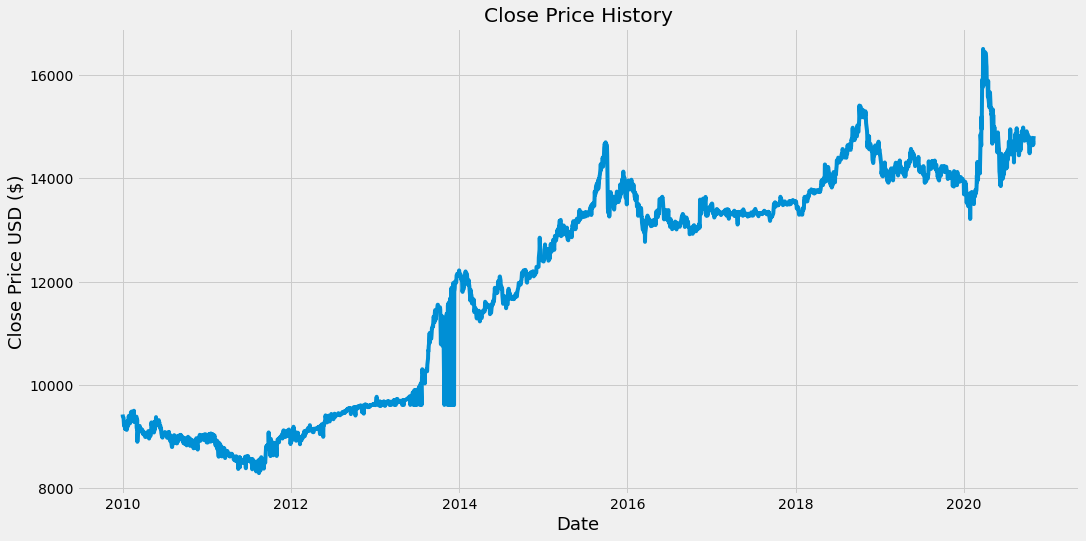

In [30]:
#Visualize the close price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
#plt.plot(df['Open'])
plt.plot(df['Updated_Close'])
#plt.plot(df['High'])
#plt.plot(df['Low'])
#plt.legend(['Open','Close','High','Low'], loc='upper left')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [8]:
#create a new dataframe with only the 'Close column'
data = df.filter(['Updated_Close'])
#convert the dataframe into numpy array
dataset = data.values
print(dataset)

#Get the number of tows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )
print(training_data_len)

[[ 9427.20019531]
 [ 9385.59960938]
 [ 9364.20019531]
 ...
 [14653.29980469]
 [14777.20019531]
 [14818.        ]]
2257


In [9]:
#scale the data to 0-1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data)
print(scaled_data.shape)

[[0.13814979]
 [0.13308403]
 [0.13047819]
 ...
 [0.77453991]
 [0.78962744]
 [0.7945957 ]]
(2821, 1)


In [10]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
print('train_data')
print(train_data)
print(train_data.shape)
print('\n')

#split the data to x_train and y_train
x_train = []
y_train = []

training_days = 60
for i in range(training_days, len(train_data)):
    x_train.append(train_data[i-training_days:i, 0])
    y_train.append(train_data[i, 0])
    if i<= training_days:
        print('first set of x_train')
        print(x_train)
        print('first y_train (60 input gives one output)')
        print(y_train)
        print()

train_data
[[0.13814979]
 [0.13308403]
 [0.13047819]
 ...
 [0.7745034 ]
 [0.77024139]
 [0.78643701]]
(2257, 1)


first set of x_train
[array([0.13814979, 0.13308403, 0.13047819, 0.12329367, 0.1126873 ,
       0.11931172, 0.1120298 , 0.10416329, 0.10695191, 0.10329876,
       0.10510095, 0.11366147, 0.10195927, 0.11413036, 0.12204551,
       0.10841316, 0.11535414, 0.1250898 , 0.13239609, 0.13483152,
       0.12569866, 0.11657186, 0.11735124, 0.12432873, 0.13052682,
       0.13324242, 0.14313018, 0.14512728, 0.12744603, 0.12441399,
       0.12632571, 0.12554644, 0.12811577, 0.1217959 , 0.1349106 ,
       0.14699036, 0.12171064, 0.12043204, 0.12775046, 0.12902906,
       0.12694681, 0.12753129, 0.13302314, 0.10858369, 0.10430944,
       0.12617968, 0.07375704, 0.10804785, 0.10720758, 0.106818  ,
       0.10474789, 0.10374934, 0.11120178, 0.10461387, 0.09824524,
       0.10077807, 0.0995726 , 0.10018146, 0.10373709, 0.10009619])]
first y_train (60 input gives one output)
[0.10227583128983

In [11]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train)
print(x_train.shape)
print('\n')
print(y_train)
print(y_train.shape)

[[0.13814979 0.13308403 0.13047819 ... 0.10018146 0.10373709 0.10009619]
 [0.13308403 0.13047819 0.12329367 ... 0.10373709 0.10009619 0.10227583]
 [0.13047819 0.12329367 0.1126873  ... 0.10009619 0.10227583 0.09987703]
 ...
 [0.67915629 0.67331126 0.67830389 ... 0.77584288 0.76305687 0.7620827 ]
 [0.67331126 0.67830389 0.67866921 ... 0.76305687 0.7620827  0.7745034 ]
 [0.67830389 0.67866921 0.68561019 ... 0.7620827  0.7745034  0.77024139]]
(2197, 60)


[0.10227583 0.09987703 0.0950183  ... 0.7745034  0.77024139 0.78643701]
(2197,)


In [12]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train)
print(x_train.shape)

[[[0.13814979]
  [0.13308403]
  [0.13047819]
  ...
  [0.10018146]
  [0.10373709]
  [0.10009619]]

 [[0.13308403]
  [0.13047819]
  [0.12329367]
  ...
  [0.10373709]
  [0.10009619]
  [0.10227583]]

 [[0.13047819]
  [0.12329367]
  [0.1126873 ]
  ...
  [0.10009619]
  [0.10227583]
  [0.09987703]]

 ...

 [[0.67915629]
  [0.67331126]
  [0.67830389]
  ...
  [0.77584288]
  [0.76305687]
  [0.7620827 ]]

 [[0.67331126]
  [0.67830389]
  [0.67866921]
  ...
  [0.76305687]
  [0.7620827 ]
  [0.7745034 ]]

 [[0.67830389]
  [0.67866921]
  [0.68561019]
  ...
  [0.7620827 ]
  [0.7745034 ]
  [0.77024139]]]
(2197, 60, 1)


In [13]:
#Build the LSTM Model
model = Sequential()
#using 50 neurons
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
#dense to 25 neurons
model.add(Dense(25))
model.add(Dense(1))

In [14]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
#Train the model
#batch size is the total number of training examples present in a single batch
#epochs is the number of iterations when an entire dataset is passed forward and backward through a neural network
model.fit(x_train, y_train, batch_size = 1, epochs = 2)

Epoch 1/2
2197/2197 [==============================] - 33s 15ms/step - loss: 0.0012
Epoch 2/2
2197/2197 [==============================] - 34s 15ms/step - loss: 6.7020e-04


In [16]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - training_days: , :]
#print(test_data[0:5])
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(training_days, len(test_data)):
    x_test.append(test_data[i-training_days:i, 0])
print(x_test[0])
print('\n')
print(y_test[0])

[0.67866921 0.68561019 0.68561019 0.68561019 0.7097697  0.68561019
 0.68561019 0.68561019 0.68561019 0.70570249 0.70387591 0.71300878
 0.71787964 0.7236029  0.73760663 0.73358817 0.73724131 0.73797194
 0.7436952  0.74111362 0.73237045 0.73285754 0.74065091 0.74101623
 0.74186863 0.74040737 0.73949408 0.74089446 0.74868783 0.75197567
 0.75258452 0.76409193 0.76114504 0.75161035 0.75891664 0.74503469
 0.74406052 0.74481552 0.75453287 0.75842956 0.75416755 0.76114504
 0.74637418 0.74345166 0.75246275 0.75258452 0.76731888 0.77316391
 0.76266718 0.76787898 0.7646399  0.76342219 0.76439636 0.7646399
 0.77584288 0.76305687 0.7620827  0.7745034  0.77024139 0.78643701]


[14723.]


In [17]:
#convert the data to numpy array  
x_test = np.array(x_test)
print(x_test)
print(x_test.shape)

[[0.67866921 0.68561019 0.68561019 ... 0.7745034  0.77024139 0.78643701]
 [0.68561019 0.68561019 0.68561019 ... 0.77024139 0.78643701 0.7830274 ]
 [0.68561019 0.68561019 0.7097697  ... 0.78643701 0.7830274  0.7963005 ]
 ...
 [0.78266209 0.73244347 0.7642137  ... 0.77290824 0.7732613  0.78317355]
 [0.73244347 0.7642137  0.77024139 ... 0.7732613  0.78317355 0.77453991]
 [0.7642137  0.77024139 0.79530195 ... 0.78317355 0.77453991 0.78962744]]
(564, 60)


In [18]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test)

[[[0.67866921]
  [0.68561019]
  [0.68561019]
  ...
  [0.7745034 ]
  [0.77024139]
  [0.78643701]]

 [[0.68561019]
  [0.68561019]
  [0.68561019]
  ...
  [0.77024139]
  [0.78643701]
  [0.7830274 ]]

 [[0.68561019]
  [0.68561019]
  [0.7097697 ]
  ...
  [0.78643701]
  [0.7830274 ]
  [0.7963005 ]]

 ...

 [[0.78266209]
  [0.73244347]
  [0.7642137 ]
  ...
  [0.77290824]
  [0.7732613 ]
  [0.78317355]]

 [[0.73244347]
  [0.7642137 ]
  [0.77024139]
  ...
  [0.7732613 ]
  [0.78317355]
  [0.77453991]]

 [[0.7642137 ]
  [0.77024139]
  [0.79530195]
  ...
  [0.78317355]
  [0.77453991]
  [0.78962744]]]


In [19]:
#Get the models prediction
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(predictions)
print(predictions.shape)

[[14574.395 ]
 [14599.1875]
 [14636.369 ]
 [14686.964 ]
 [14741.996 ]
 [14776.118 ]
 [14783.835 ]
 [14784.092 ]
 [14779.579 ]
 [14769.362 ]
 [14748.527 ]
 [14737.4795]
 [14747.45  ]
 [14758.263 ]
 [14770.225 ]
 [14773.259 ]
 [14769.236 ]
 [14770.427 ]
 [14797.919 ]
 [14825.524 ]
 [14838.923 ]
 [14841.801 ]
 [14862.852 ]
 [14884.687 ]
 [14919.117 ]
 [14994.0205]
 [15035.412 ]
 [15092.592 ]
 [15117.36  ]
 [15121.475 ]
 [15131.928 ]
 [15126.896 ]
 [15116.562 ]
 [15105.678 ]
 [15107.574 ]
 [15124.181 ]
 [15121.348 ]
 [15124.988 ]
 [15117.391 ]
 [15120.398 ]
 [15124.84  ]
 [15122.144 ]
 [15130.807 ]
 [15138.323 ]
 [15132.542 ]
 [15103.049 ]
 [15050.416 ]
 [14993.765 ]
 [14930.917 ]
 [14841.384 ]
 [14775.571 ]
 [14723.396 ]
 [14706.255 ]
 [14704.162 ]
 [14712.096 ]
 [14684.328 ]
 [14653.834 ]
 [14633.535 ]
 [14622.253 ]
 [14611.37  ]
 [14598.019 ]
 [14575.585 ]
 [14552.253 ]
 [14539.6   ]
 [14515.579 ]
 [14475.5625]
 [14426.536 ]
 [14388.35  ]
 [14377.398 ]
 [14376.876 ]
 [14395.906 ]
 [1440

In [20]:
#get the root mean squared error (rmse)
rmse = np.sqrt( np.mean( ( (predictions- y_test)**2) ) )
print(rmse)

171.49293669312823


In [21]:
#plot the output data
train = data[:training_data_len]
valid = data[training_data_len:]
print(valid)
print(predictions.shape)

            Updated_Close
Date                     
2018-09-02   14723.000000
2018-09-03   14832.000000
2018-09-04   14930.000000
2018-09-05   14979.900391
2018-09-06   14893.000000
...                   ...
2020-10-26   14642.799805
2020-10-27   14724.200195
2020-10-28   14653.299805
2020-10-29   14777.200195
2020-10-30   14818.000000

[564 rows x 1 columns]
(564, 1)


In [22]:
#adding the column 'Predictions' and print the validation data and the output data
valid['Predictions'] = predictions
print(valid)

            Updated_Close   Predictions
Date                                   
2018-09-02   14723.000000  14574.394531
2018-09-03   14832.000000  14599.187500
2018-09-04   14930.000000  14636.369141
2018-09-05   14979.900391  14686.963867
2018-09-06   14893.000000  14741.996094
...                   ...           ...
2020-10-26   14642.799805  14617.314453
2020-10-27   14724.200195  14609.528320
2020-10-28   14653.299805  14615.600586
2020-10-29   14777.200195  14615.242188
2020-10-30   14818.000000  14631.691406

[564 rows x 2 columns]


<ipython-input-22-5d86f50291ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


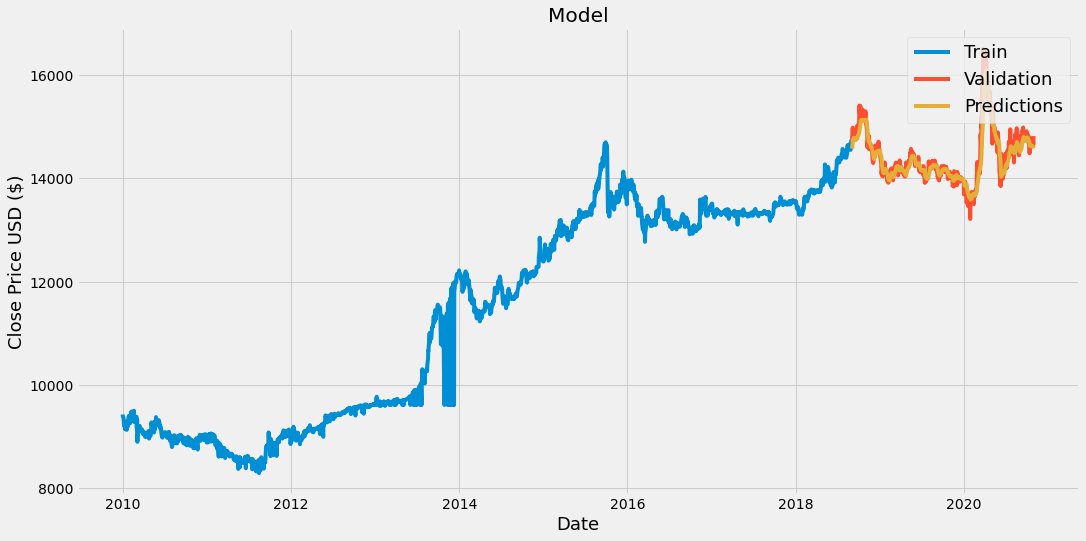

In [49]:
#visualize the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train)
plt.plot(valid['Updated_Close'])
plt.plot(valid['Predictions'])
#plt.plot(predictions)
plt.legend(['Train','Validation', 'Predictions'], loc='upper right', fontsize = 18)
plt.show()

In [24]:
#Get the quote for one day (using 60 previous days data)
#obtaining 'Close' for the last 60 days and convert to array
last_60_days = data[-training_days:].values
#scale the data between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
x_test2 = []
#append the past 60 days
x_test2.append(last_60_days_scaled)
#convert the x_test2 data set to numpy array
x_test2 = np.array(x_test2)
#reshape the data
x_test2 = np.reshape(x_test2, (x_test2.shape[0], x_test2.shape[1], 1))
#get the predicted scale price
pred_price = model.predict(x_test2)
#undo the scalling
pred_price = scaler.inverse_transform(pred_price)
print("Price for the next day after " + end_date + " is " + str(pred_price) )

Price for the next day after 2020-10-30 is [[14657.945]]
